In [1]:
#########################
#Multi-class ML Classifier
########################

from sklearn.model_selection import train_test_split
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import seaborn as sns
import pickle

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, f1_score
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import LinearSVC
import shap

In [2]:
train = pd.read_excel(r'',sheet_name="train")
test = pd.read_excel(r'',sheet_name="test")



In [3]:
# Select columns 

X_train = train[train.columns[~train.columns.isin(['friendlyName','Cluster','label'])]]
y_train = train.Cluster
X_test = test[test.columns[~test.columns.isin(['friendlyName','Cluster','label'])]]


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, shuffle=True,random_state = 0)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
n_classes = 8

(1746, 26)
(983, 26)
(437, 26)


In [6]:
###### Apply SMOTE #######
counter = Counter(y_train)
print('Before',counter)

###Random oversample with SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'Cluster4': 261, 'Cluster2': 231, 'Cluster3': 231, 'Cluster7': 229, 'Cluster0': 223, 'Cluster5': 213, 'Cluster6': 198, 'Cluster1': 160})
After Counter({'Cluster7': 261, 'Cluster1': 261, 'Cluster2': 261, 'Cluster4': 261, 'Cluster6': 261, 'Cluster0': 261, 'Cluster5': 261, 'Cluster3': 261})


In [8]:
X_train = X_train_sm
y_train = y_train_sm

In [10]:
##### Build the Random Forest Classifier on train data and evaluate on validation data####
ovr_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100,random_state=0))
ovr_classifier.fit(X_train, y_train)
dirP = 'onevsrest_trained_weights/'
file = "RF_model"
filename = f'{dirP}_{file}.sav'
pickle.dump(ovr_classifier, open(filename, 'wb'))

preds = ovr_classifier.predict(X_val)
cnf_matrix = confusion_matrix(y_val, preds)

In [ ]:
##### Gradient Boosting Classifier ######
ovr_classifier = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
dirP = 'onevsrest_trained_weights/'
file = "GB_model"
filename = f'{dirP}_{file}.sav'
pickle.dump(ovr_classifier, open(filename, 'wb'))
preds = ovr_classifier.predict(X_val)
cnf_matrix = confusion_matrix(y_val, preds)

In [ ]:
##### LR ######
ovr_classifier = LogisticRegression(random_state=42).fit(X_train, y_train)
ovr_classifier.fit(X_train, y_train)
dirP = 'onevsrest_trained_weights/'
file = "LR_model"
filename = f'{dirP}_{file}.sav'
pickle.dump(ovr_classifier, open(filename, 'wb'))
preds = ovr_classifier.predict(X_val)
cnf_matrix = confusion_matrix(y_val, preds)

In [ ]:
#### Support Vector Machine ######
from sklearn.svm import SVC

##### Approach 1######
svc_linear = sklearn.svm.SVC(kernel='linear', probability=True)
svc_linear.fit(X_train, y_train)
svm = LinearSVC(random_state=42)

###### Approach 2###########
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear',random_state=42).fit(X_train, y_train))
dirP = 'onevsrest_trained_weights/'
file = "SVM_model"
filename = f'{dirP}_{file}.sav'
pickle.dump(ovr_classifier, open(filename, 'wb'))
preds = ovr_classifier.predict(X_val)
cnf_matrix = confusion_matrix(y_val, preds)

In [ ]:
##### XGBoost Boosting Classifier ######
import xgboost as xgb
ovr_classifier = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
ovr_classifier.fit(X_train, y_train)
dirP = 'onevsrest_trained_weights/'
file = "XGB_model"
filename = f'{dirP}_{file}.sav'
pickle.dump(ovr_classifier, open(filename, 'wb'))
preds = ovr_classifier.predict(X_val)
cnf_matrix = confusion_matrix(y_val, preds)

<AxesSubplot:>

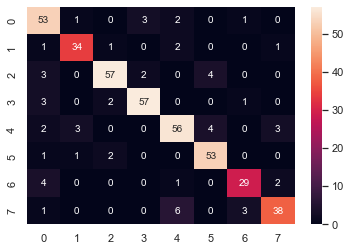

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.0) # for label size
sns.heatmap(cnf_matrix,annot=True,fmt='g',annot_kws={"size": 10}) # font size

In [29]:
##### Feature Importances for each endotype #####
importances = ovr_classifier.estimators_[0].feature_importances_
sorted_indices = np.argsort(importances)[::-1]
labels = X_train.columns[1:]

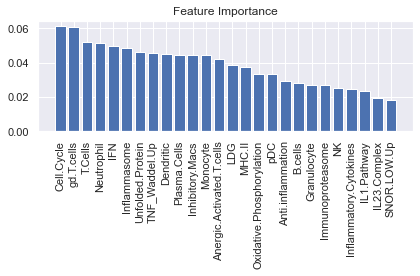

In [30]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [22]:
ovr_classifier.estimators_[1].feature_importances_

array([0.02532282, 0.02201975, 0.02007432, 0.13689956, 0.03332067,
       0.04790365, 0.02760342, 0.0301735 , 0.05567534, 0.01438608,
       0.02566135, 0.07619885, 0.0231588 , 0.04381694, 0.01654337,
       0.01953064, 0.05550429, 0.0221958 , 0.01987165, 0.02525898,
       0.03764198, 0.09766364, 0.01871514, 0.04051484, 0.01955157,
       0.04479304])

In [77]:
####Function to calculate the senstivity, specificity, Precision, Accuracy from the confusion matrix for each label or cluster##
# Note : The self.rows has to be changed based according to the labels in your input data####
class Classifier:
    def __init__(self,col_sum,row_sum,total_sum,diagonals):
        self.partitions = []
        self.col_sum = col_sum
        self.row_sum = row_sum
        self.total_sum = total_sum
        self.diagonals = diagonals
        #self.rows = ['C0','C1','C2','C3','C4','C5','C6','C7']
        self.rows = ['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7']
        #self.rows = ['A','B','C','D','E','F','G','H']
        self.columns = ['Sensitivity','Specificity','Precision','Accuracy','f1-score']
        self.df = pd.DataFrame(columns=['Sensitivity','Specificity','Precision','Accuracy','f1-score'])
    
    def calculate(self):
        for i in range(len(self.rows)):
            FP = col_sum[i] - diagonals[i]
            FN = row_sum[i] - diagonals[i]
            TP = diagonals[i]
            TN = cnf_matrix.sum() - (col_sum[i]+row_sum[i]-diagonals[i])
            FP = FP.astype(float)
            FN = FN.astype(float)
            TP = TP.astype(float)
            TN = TN.astype(float)
            # Sensitivity, hit rate, recall, or true positive rate
            TPR = round(TP/(TP+FN),2)
            # Specificity or true negative rate
            TNR = round(TN/(TN+FP),2) 
            # Precision or positive predictive value
            PPV = round(TP/(TP+FP),2)
            # Negative predictive value
            NPV = round(TN/(TN+FN),2)
            # Overall accuracy for each class
            ACC = round((TP+TN)/(TP+FP+FN+TN),2)
            f1 = round(2*(PPV * TPR)/(PPV + TPR),2)
            data = [TPR,TNR,PPV,ACC,f1]
            self.df.loc[i] = data

    def updaterowslabels(self):
        self.df.index = self.rows
        
    def getdataframe(self):
        self.partitions.append(self.df)
        return self.df

In [78]:
col_sum = cnf_matrix.sum(axis=0)
row_sum = cnf_matrix.sum(axis=1)
tot_sum = cnf_matrix.sum()
diagonals = np.diag(cnf_matrix)
classifier = Classifier(col_sum,row_sum,tot_sum,diagonals)
classifier.calculate()
classifier.updaterowslabels()
results = classifier.getdataframe()

In [79]:
import dataframe_image as dfi
results_styled = results.style.background_gradient()

In [80]:
from tabulate import tabulate
import plotly.figure_factory as ff
print(tabulate(results,headers=["Cluster","Sensitivity", "Specificity","Precision","Accuracy","f1-score"], tablefmt='psql'))

+-----------+---------------+---------------+-------------+------------+------------+
| Cluster   |   Sensitivity |   Specificity |   Precision |   Accuracy |   f1-score |
|-----------+---------------+---------------+-------------+------------+------------|
| Cluster0  |          0.85 |          0.95 |        0.75 |       0.94 |       0.8  |
| Cluster1  |          0.9  |          0.97 |        0.78 |       0.97 |       0.84 |
| Cluster2  |          0.95 |          0.98 |        0.9  |       0.98 |       0.92 |
| Cluster3  |          0.83 |          1    |        0.98 |       0.97 |       0.9  |
| Cluster4  |          0.82 |          0.97 |        0.85 |       0.95 |       0.83 |
| Cluster5  |          0.89 |          0.98 |        0.88 |       0.97 |       0.88 |
| Cluster6  |          0.81 |          0.99 |        0.83 |       0.97 |       0.82 |
| Cluster7  |          0.77 |          0.99 |        0.88 |       0.96 |       0.82 |
+-----------+---------------+---------------+---------

In [81]:
##### Evaluating the classifier on validation data #########
y_score = ovr_classifier.predict_proba(X_val)

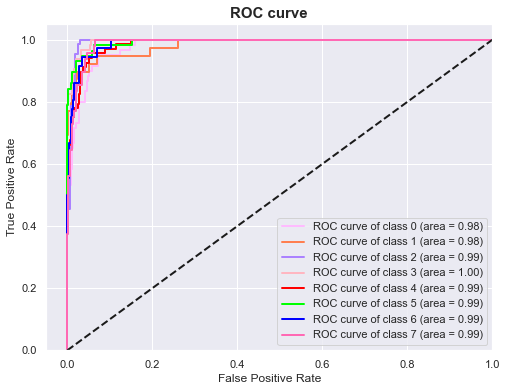

In [83]:
###### ROC curve ########
fig = plt.figure(figsize=(8,6))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_p[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = cycle(['plum1', 'coral', 'mediumpurple1','lightpink','red1','green1','blue','hotpink'])
colors = sns.color_palette(['#FFBBFF','#FF7F50','#AB82FF','#FFB6C1','#FF0000','#00FF00','#0000FF','#FF69B4'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve", fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
#plt.legend(loc="lower right")
plt.legend(loc=4)
#plt.show()
#plt.savefig("/Users/prat/Desktop/Endotype_paper_revised_ML_2022_Dec/KMeans_using_train_test_data/RF_Onevsrest_ROC_curve_VSet_ForPaper.svg",bbox_inches='tight',dpi=100)

In [31]:
###### evaluating on test data using model weight stored as pickle file #####

dirP = 'onevsrest_trained_weights'
file = "RF_model"
filename = f'{dirP}_{file}.sav'
loaded_model = pickle.load(open(filename, 'rb'))

preds_t = loaded_model.predict(X_test)
#cnf_matrix_t = confusion_matrix(y_test, preds_t)

In [86]:
preds_df = pd.DataFrame(preds_t)
preds_df['friendlyName'] = test.iloc[:,0]
preds_df.to_excel(r'Predicted_labels_test-set.xlsx')

In [133]:
import dataframe_image as dfi
results_styled = results.style.background_gradient()
dfi.export(results, '.png')

In [134]:
#y_score = ovo_classifier.decision_function(X_test)
y_score = loaded_model.predict_proba(X_test)
#print(y_score)

In [110]:
##### Load the model weights of your interest and apply SHAP###
dirP = 'onevsrest_trained_weights/'
file = "RF_model"
filename = f'{dirP}_{file}.sav'
model = pickle.load(open(filename, 'rb'))

In [111]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,approximate=True)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [112]:
feature_names = list(X_test.columns)
#print(feature_names[24])

TNF_Waddel.Up


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


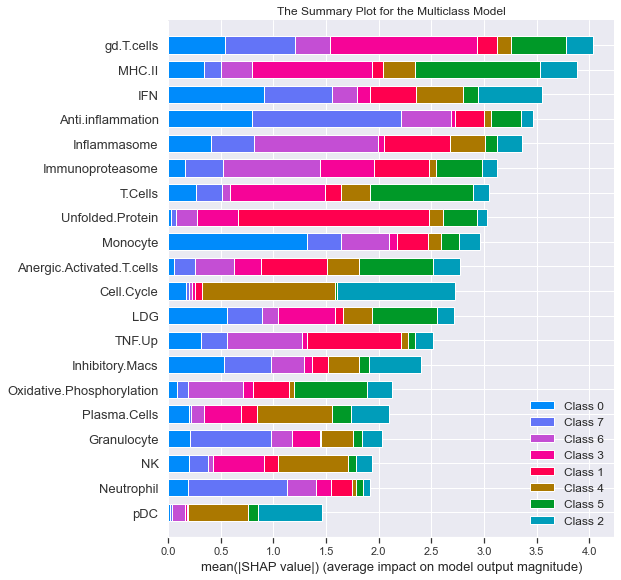

In [114]:
import shap
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,approximate=True)
plt.figure()
plt.title('The Summary Plot for the Multiclass Model')
shap.summary_plot(shap_values, X_test, feature_names = feature_names,plot_type="bar",show=False)
plt.savefig('.pdf',bbox_inches='tight',dpi=100)
#plt.close() 